<a href="https://colab.research.google.com/github/yx1226/Genetic-programming-in-data-mining-for-drug-discovery.-/blob/main/ChemBL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library and tool installation

In [3]:
#Install any module
# !pip install PyDrive 
!pip install deap # GP Library
!pip install gplearn 

!wget -c https://repo.continuum.io/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
!chmod +x Miniconda3-py37_4.8.3-Linux-x86_64.sh
!time bash ./Miniconda3-py37_4.8.3-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

!pip install rdkit
!pip install mordred
!pip install catboost

     |████████████████████████████████| 163kB 6.3MB/s 
     |████████████████████████████████| 51kB 4.2MB/s 
--2021-02-19 18:52:16--  https://repo.continuum.io/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh [following]
--2021-02-19 18:52:17--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88867207 (85M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.3-Linux-x86_64.sh’

Miniconda3-py

     |████████████████████████████████| 65.7 MB 10 kB/s 
     |████████████████████████████████| 13.2 MB 48.4 MB/s 
     |████████████████████████████████| 27.4 MB 75 kB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11430 sha256=96aa6bf6b01a1be3f1b6ea353b86c5e498a2f644aafaccb76b801c214a6f5397
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


# Data Preprocessing and Transformation



>Import all the dataset from the Google Drive

In [4]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authos# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authoization.
drive.mount('/content/drive', force_remount=True)

# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/ChemBL"

Mounted at /content/drive
5ht1A.csv  at1.csv  fxa.csv		  hivp.csv  pde4.csv   subp.csv
5ht3.csv   cox.csv  gplearn_functions.py  mmp1.csv  pkc.csv    thrm.csv
ache.csv   d2.csv   gplearn_genetic.py	  mmp.csv   renin.csv


In [5]:
import pandas as pd
import numpy as np
from glob import glob

filenames = glob('/content/drive/My Drive/ChemBL/*.csv')
dataframes = [pd.read_csv(f) for f in filenames]

In [6]:
files = []

# Get the filenames
for filename in filenames:
  files.append(filename)

print(files)

['/content/drive/My Drive/ChemBL/mmp.csv', '/content/drive/My Drive/ChemBL/at1.csv', '/content/drive/My Drive/ChemBL/mmp1.csv', '/content/drive/My Drive/ChemBL/pkc.csv', '/content/drive/My Drive/ChemBL/pde4.csv', '/content/drive/My Drive/ChemBL/5ht3.csv', '/content/drive/My Drive/ChemBL/cox.csv', '/content/drive/My Drive/ChemBL/ache.csv', '/content/drive/My Drive/ChemBL/fxa.csv', '/content/drive/My Drive/ChemBL/d2.csv', '/content/drive/My Drive/ChemBL/renin.csv', '/content/drive/My Drive/ChemBL/hivp.csv', '/content/drive/My Drive/ChemBL/subp.csv', '/content/drive/My Drive/ChemBL/thrm.csv', '/content/drive/My Drive/ChemBL/5ht1A.csv']


In [7]:
dataList = []

for dataframe in dataframes:
  #dataframe = pd.DataFrame(dataframe)
  dataList.append(dataframe)
  
print(dataList)

[      Column1  ... CLASS_LABEL
0        1483  ...           1
1        1484  ...           1
2        1514  ...           1
3        1515  ...           1
4        1548  ...           1
...       ...  ...         ...
3819  1584109  ...           0
3820  1584114  ...           0
3821  1590100  ...           0
3822  1590111  ...           0
3823  1590117  ...           0

[3824 rows x 169 columns],      Column1  ... CLASS_LABEL
0       2725  ...           1
1       9926  ...           1
2      32747  ...           1
3      38798  ...           1
4      38799  ...           1
..       ...  ...         ...
101    16308  ...           0
102    16591  ...           0
103    18694  ...           0
104    18695  ...           0
105    18834  ...           0

[106 rows x 169 columns],      Column1  ... CLASS_LABEL
0       1483  ...           1
1       1484  ...           1
2       1514  ...           1
3       1515  ...           1
4       1548  ...           1
..       ...  ...         ...
39

> From the data observation, we can see that all the datasets have **169 cols**. So I did the data preprocessing by using standard scaler to check any missing value inside the dataset.



In [8]:
index = [#'Column1', 'Column9',	
         'MDLPublicKeys[1]', 'MDLPublicKeys[2]', 'MDLPublicKeys[3]', 'MDLPublicKeys[4]',
         'MDLPublicKeys[5]', 'MDLPublicKeys[6]', 'MDLPublicKeys[7]', 'MDLPublicKeys[8]',
         'MDLPublicKeys[9]', 'MDLPublicKeys[10]', 'MDLPublicKeys[11]', 'MDLPublicKeys[12]',
         'MDLPublicKeys[13]', 'MDLPublicKeys[14]', 'MDLPublicKeys[15]', 'MDLPublicKeys[16]',
         'MDLPublicKeys[17]', 'MDLPublicKeys[18]',' MDLPublicKeys[19]', 'MDLPublicKeys[20]',
         'MDLPublicKeys[21]', 'MDLPublicKeys[22]', 'MDLPublicKeys[23]', 'MDLPublicKeys[24]',
         'MDLPublicKeys[25]', 'MDLPublicKeys[26]', 'MDLPublicKeys[27]', 'MDLPublicKeys[28]',
         'MDLPublicKeys[29]', 'MDLPublicKeys[30]', 'MDLPublicKeys[31]', 'MDLPublicKeys[32]',
         'MDLPublicKeys[33]', 'MDLPublicKeys[34]', 'MDLPublicKeys[35]',	'MDLPublicKeys[36]',
         'MDLPublicKeys[37]',	'MDLPublicKeys[38]',	'MDLPublicKeys[39]', 'MDLPublicKeys[40]',
         'MDLPublicKeys[41]',	'MDLPublicKeys[42]',	'MDLPublicKeys[43]', 'MDLPublicKeys[44]',
         'MDLPublicKeys[45]',	'MDLPublicKeys[46]',	'MDLPublicKeys[47]', 'MDLPublicKeys[48]',
         'MDLPublicKeys[49]',	'MDLPublicKeys[50]', 'MDLPublicKeys[51]',	'MDLPublicKeys[52]', 'MDLPublicKeys[53]',
         'MDLPublicKeys[54]',	'MDLPublicKeys[55]', 'MDLPublicKeys[56]',	'MDLPublicKeys[57]',	'MDLPublicKeys[58]',
         'MDLPublicKeys[59]', 'MDLPublicKeys[60]', 'MDLPublicKeys[61]', 'MDLPublicKeys[62]',
         'MDLPublicKeys[63]',	'MDLPublicKeys[64]', 'MDLPublicKeys[65]',	'MDLPublicKeys[66]',	
         'MDLPublicKeys[67]', 'MDLPublicKeys[68]', 'MDLPublicKeys[69]', 'MDLPublicKeys[70]',
         'MDLPublicKeys[71]', 'MDLPublicKeys[72]', 'MDLPublicKeys[73]', 'MDLPublicKeys[74]', 'MDLPublicKeys[75]', 'MDLPublicKeys[76]',
         'MDLPublicKeys[77]', 'MDLPublicKeys[78]', 'MDLPublicKeys[79]','MDLPublicKeys[80]',	
         'MDLPublicKeys[81]', 'MDLPublicKeys[82]', 'MDLPublicKeys[83]','MDLPublicKeys[84]',	
         'MDLPublicKeys[85]', 'MDLPublicKeys[86]', 'MDLPublicKeys[87]','MDLPublicKeys[88]',
         'MDLPublicKeys[89]', 'MDLPublicKeys[90]', 'MDLPublicKeys[91]','MDLPublicKeys[92]',
         'MDLPublicKeys[93]', 'MDLPublicKeys[94]', 'MDLPublicKeys[95]','MDLPublicKeys[96]',
         'MDLPublicKeys[97]', 'MDLPublicKeys[98]', 'MDLPublicKeys[99]','MDLPublicKeys[100]',
         'MDLPublicKeys[101]', 'MDLPublicKeys[102]', 'MDLPublicKeys[103]','MDLPublicKeys[104]',
         'MDLPublicKeys[105]', 'MDLPublicKeys[106]', 'MDLPublicKeys[107]','MDLPublicKeys[108]',
         'MDLPublicKeys[109]', 'MDLPublicKeys[110]', 'MDLPublicKeys[111]','MDLPublicKeys[112]',
         'MDLPublicKeys[113]', 'MDLPublicKeys[114]', 'MDLPublicKeys[115]','MDLPublicKeys[116]',
         'MDLPublicKeys[117]', 'MDLPublicKeys[118]', 'MDLPublicKeys[119]', 'MDLPublicKeys[120]',
         'MDLPublicKeys[121]', 'MDLPublicKeys[122]', 'MDLPublicKeys[123]', 'MDLPublicKeys[124]',
         'MDLPublicKeys[125]', 'MDLPublicKeys[126]', 'MDLPublicKeys[127]', 'MDLPublicKeys[128]',
         'MDLPublicKeys[129]', 'MDLPublicKeys[130]', 'MDLPublicKeys[131]', 'MDLPublicKeys[132]',
         'MDLPublicKeys[133]', 'MDLPublicKeys[134]', 'MDLPublicKeys[135]', 'MDLPublicKeys[136]',
         'MDLPublicKeys[137]', 'MDLPublicKeys[138]', 'MDLPublicKeys[139]', 'MDLPublicKeys[140]',
         'MDLPublicKeys[141]', 'MDLPublicKeys[142]', 'MDLPublicKeys[143]', 'MDLPublicKeys[144]',
         'MDLPublicKeys[145]', 'MDLPublicKeys[146]', 'MDLPublicKeys[147]', 'MDLPublicKeys[148]',
         'MDLPublicKeys[149]', 'MDLPublicKeys[150]', 'MDLPublicKeys[151]', 'MDLPublicKeys[152]', 
         'MDLPublicKeys[153]', 'MDLPublicKeys[154]', 'MDLPublicKeys[155]', 'MDLPublicKeys[156]', 
         'MDLPublicKeys[157]', 'MDLPublicKeys[158]', 'MDLPublicKeys[159]', 'MDLPublicKeys[160]', 
         'MDLPublicKeys[161]','MDLPublicKeys[162]', 'MDLPublicKeys[163]', 'MDLPublicKeys[164]',
         'MDLPublicKeys[165]', 'MDLPublicKeys[166]'
         #'CLASS_LABEL'
         ]

In [9]:
import array, random, operator, math
from sklearn.preprocessing import StandardScaler

i = 0
data_distribution = []

for dataframe in dataframes:
  array = dataframe.to_numpy()
  X = array[:,2:168]
  y = array[:,-1]
  data = StandardScaler().fit_transform(X)
  data_distribution = [(files[i],data)]
  print(files[i])
  print(data, "\n")
  i = i +1

/content/drive/My Drive/ChemBL/mmp.csv
[[-0.37115579 -0.05120468  0.         ...  0.13252371  0.3489077
   0.07250947]
 [-0.37115579 -0.05120468  0.         ...  0.13252371  0.3489077
   0.07250947]
 [-0.37115579 -0.05120468  0.         ...  0.13252371  0.3489077
   0.07250947]
 ...
 [ 2.69428641 -0.05120468  0.         ...  0.13252371  0.3489077
   0.07250947]
 [ 2.69428641 -0.05120468  0.         ...  0.13252371  0.3489077
   0.07250947]
 [ 2.69428641 -0.05120468  0.         ...  0.13252371  0.3489077
   0.07250947]] 

/content/drive/My Drive/ChemBL/at1.csv
[[-0.34027852  0.          0.         ...  0.         -2.01186954
   0.        ]
 [-0.34027852  0.          0.         ...  0.          0.49705012
   0.        ]
 [-0.34027852  0.          0.         ...  0.          0.49705012
   0.        ]
 ...
 [-0.34027852  0.          0.         ...  0.          0.49705012
   0.        ]
 [-0.34027852  0.          0.         ...  0.          0.49705012
   0.        ]
 [-0.34027852  0.       

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

tableau_20 = [(31,119,180), (174,199,232), (255,127,14),
              (255,187,120), (44,160,44), (152,223,138),
              (214,39,40), (255,152,150), (148,103,189)]

for i in range(len(tableau_20)):
  r, g, b = tableau_20[i]
  tableau_20[i] = (r/255., g/255., b/255.)

def make_plot(item):
  temp = index[:]
  file_, X = data_distribution[item]
  dfTemp = pd.DataFrame(X, columns=temp)

  print(file_, ":")

  sns.set_style("whitegrid")

  #Check The correlation wherethe is +VE or -VE
  g = sns.jointplot(x = "MDLPublicKeys[54]", y = "MDLPublicKeys[166]",
                    data = dfTemp, kind = "reg", color = tableau_20[6])
  #corr = dfTemp.corr()
  #sns.heatmap(corr)
  
  plt.show()
  print()

/content/drive/My Drive/ChemBL/5ht1A.csv :


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


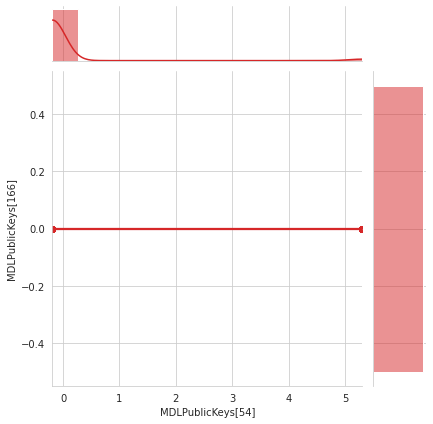


/content/drive/My Drive/ChemBL/5ht1A.csv :


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


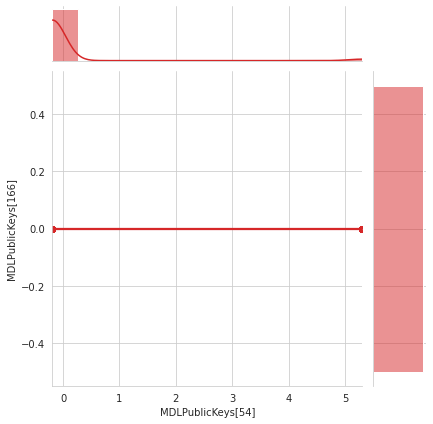


/content/drive/My Drive/ChemBL/5ht1A.csv :


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


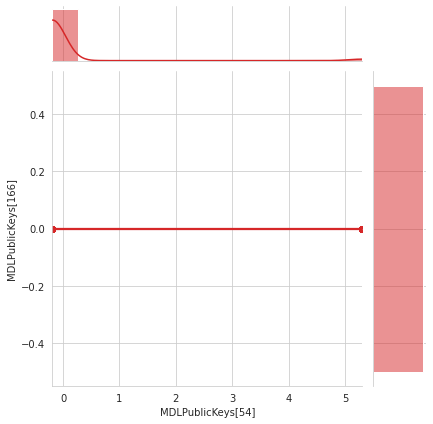


/content/drive/My Drive/ChemBL/5ht1A.csv :


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


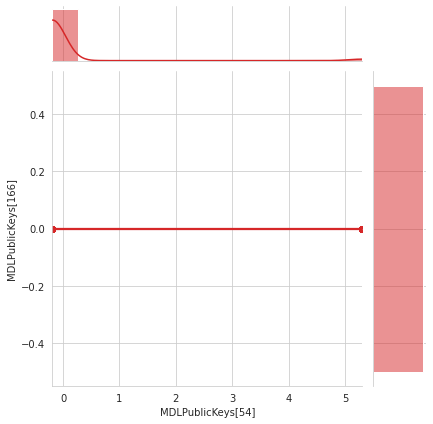


/content/drive/My Drive/ChemBL/5ht1A.csv :


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


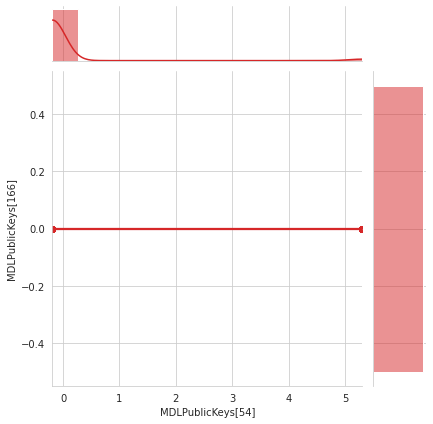


/content/drive/My Drive/ChemBL/5ht1A.csv :


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


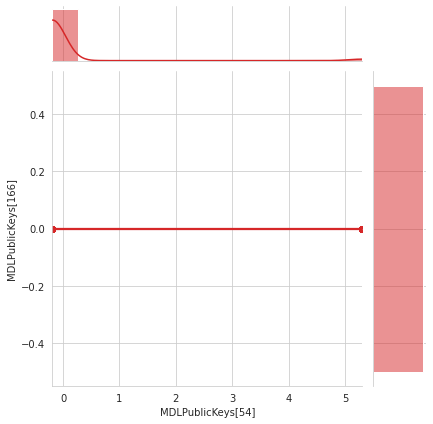


/content/drive/My Drive/ChemBL/5ht1A.csv :


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


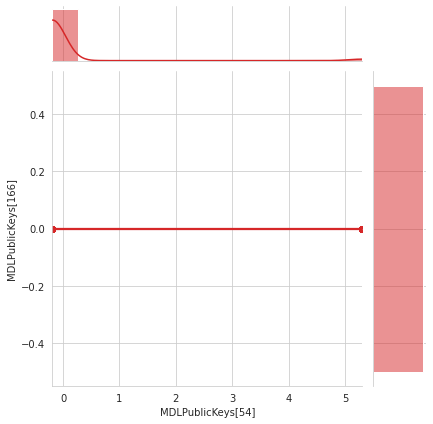


/content/drive/My Drive/ChemBL/5ht1A.csv :


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


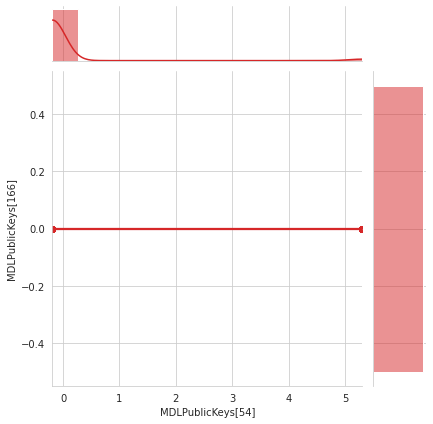


/content/drive/My Drive/ChemBL/5ht1A.csv :


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


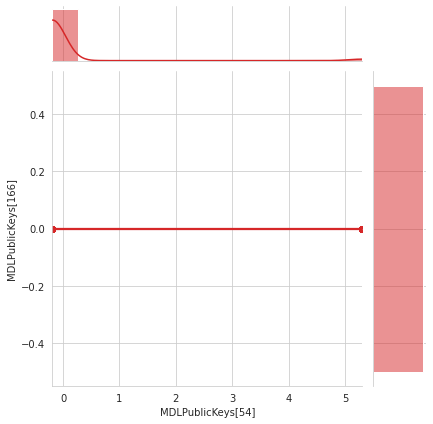


/content/drive/My Drive/ChemBL/5ht1A.csv :


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


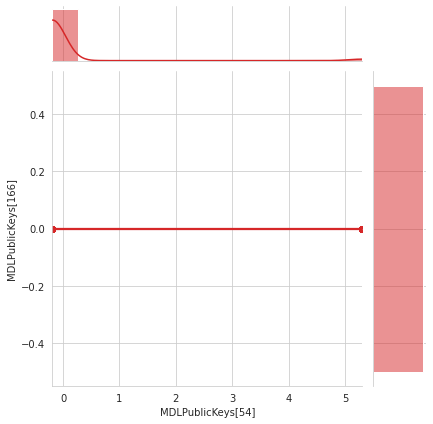


/content/drive/My Drive/ChemBL/5ht1A.csv :


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


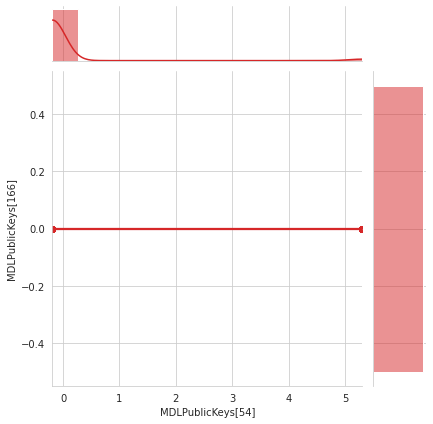


/content/drive/My Drive/ChemBL/5ht1A.csv :


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


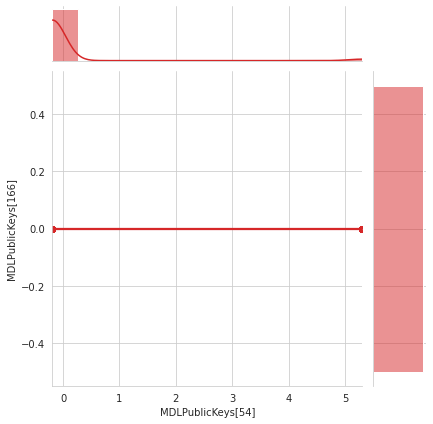


/content/drive/My Drive/ChemBL/5ht1A.csv :


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


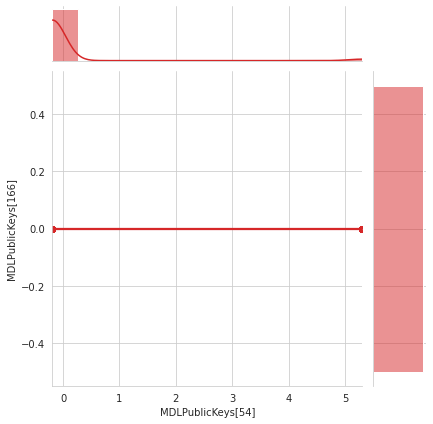


/content/drive/My Drive/ChemBL/5ht1A.csv :


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


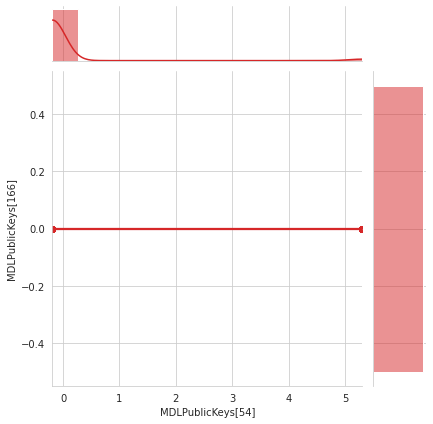


/content/drive/My Drive/ChemBL/5ht1A.csv :


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


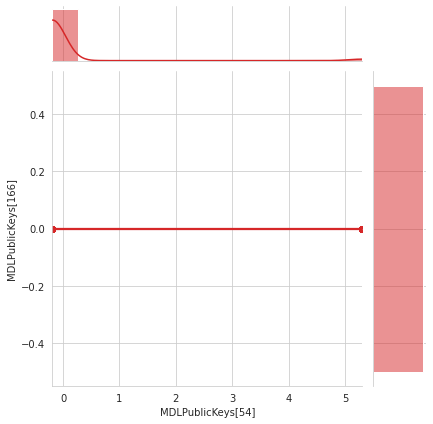

In [11]:
# for distribution in range(len(data_distribution)):
  # make_plot(distribution)

for dataframe in dataframes:
  array = dataframe.to_numpy()
  X = array[:,2:168]
  y = array[:,-1]
  data = StandardScaler().fit_transform(X)
  for distribution in range(len(data_distribution)):
    make_plot(distribution)

After the data preprocessing, we can know that all of them do not has any missing value.

In [12]:
#Create a list 
dataList = []
for dataframe in dataframes:
  dataList.append(dataframe)

print(dataList)

[      Column1  ... CLASS_LABEL
0        1483  ...           1
1        1484  ...           1
2        1514  ...           1
3        1515  ...           1
4        1548  ...           1
...       ...  ...         ...
3819  1584109  ...           0
3820  1584114  ...           0
3821  1590100  ...           0
3822  1590111  ...           0
3823  1590117  ...           0

[3824 rows x 169 columns],      Column1  ... CLASS_LABEL
0       2725  ...           1
1       9926  ...           1
2      32747  ...           1
3      38798  ...           1
4      38799  ...           1
..       ...  ...         ...
101    16308  ...           0
102    16591  ...           0
103    18694  ...           0
104    18695  ...           0
105    18834  ...           0

[106 rows x 169 columns],      Column1  ... CLASS_LABEL
0       1483  ...           1
1       1484  ...           1
2       1514  ...           1
3       1515  ...           1
4       1548  ...           1
..       ...  ...         ...
39

# TPOT

In [22]:
!apt install tpot

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package tpot


In [23]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tpot import TPOTClassifier

ModuleNotFoundError: ignored

In [ ]:
tpot = TPOTClassifier(generations=5, 
                      population_size=50, 
                      verbosity=2, 
                      n_jobs=-1)

"""for dataframe in dataframes:
  array = dataframe.to_numpy()
  X = array[:,2:168]
  y = array[:,-1]
  X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=2021)
  tpot_classifier = tpot.fit(X_train, y_train)
  
  print(tpot_classifier)
  print("---------------------------\n\n")"""

for data in dataframes :
  X = data.loc[:, "MDLPublicKeys[1]":"MDLPublicKeys[166]"]
  y = data.loc[:, "CLASS_LABEL"]

  X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=2021)
  
  tpot_classifier = tpot.fit(X_train, y_train)
  
  print(tpot_classifier)
  print("---------------------------\n\n")

# Genetic Programming

In [24]:
import random
import operator
import math

from deap import algorithms, base, creator, gp, tools
from gplearn.functions import make_function
from gplearn.genetic import SymbolicRegressor
%pylab inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sympy import *
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random', 'array']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


> Symbolic Regressor Genetic Programming

In [25]:
## CREATE EQUATION 
"""
Terminal 
N: total number of compounds, 
NACT: number of active compounds, 
NINACT: number of inactive compounds, 
TOT: total number of compounds containing fragment I, 
ACT: total number of active compounds containing fragment I, 
INACT: total number of inactive compounds containing fragment I
"""

converter = {
    'sub': lambda N, TOT : N-TOT, 
    'sub_1': lambda NINACT, INACT: NINACT-INACT, 
    'sub_2': lambda NACT, ACT: NACT-ACT,
    'div': lambda NACT, N, TOT, ACT, INACT : NACT/N,
    'div_1': lambda TOT, N: TOT/(N-TOT),
    'div_2': lambda ACT, INACT, TOT: (ACT- INACT)/TOT,
    'mul': lambda TOT, NACT : TOT*NACT ,
    'mul_1': lambda TOT, NACT, N : TOT * (NACT/N),
    'mul_2': lambda TOT, NACT, N, ACT : (ACT-TOT) * (NACT/N),
    'sqrt': lambda INACT, N: (INACT/N)**0.125
}

#function_set = ['sub', 'sub_1', 'sub_2', 'div', 'div_1', 'div_2', 'mul','mul_1','mul_2','sqrt']
function_set = ['sub', 'add', 'div', 'mul','sqrt']

In [28]:
  symbolicRegressor_gp = SymbolicRegressor(population_size=5000,
                             function_set=function_set,
                             generations=40, 
                             stopping_criteria=0.01,
                             p_crossover=0.7, 
                             p_subtree_mutation=0.1,
                             p_hoist_mutation=0.05, 
                             p_point_mutation=0.1,
                             max_samples=0.9, 
                             verbose=1,
                             parsimony_coefficient=0.01, 
                             random_state=0,
                             feature_names = index,
                             metric  = 'mean absolute error')

In [ ]:
i = 0
training_and_testing_list = []
for dataframe in dataframes:
  array = dataframe.to_numpy()
  X = array[:,2:168]
  y = array[:,-1]

  # Splitting the data into training and testing dataset
  X_train,X_test,y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=400)
  
  training_and_testing_list.append(X_train,X_test,y_train, y_test)
  
  t0 = time.time()
  print(files[i], ": ")
  symbolicRegressor_gp.fit(X_train, y_train)
  print('Time to fit:', time.time() - t0, 'seconds')
  print('\n\n')

  #print('R2:',est_gp.score(X_test,y_test))
  #next_e = sympify(str(formulae), locals=converter)
  #print('Formula: ',est_gp)
  #y_gp = est_gp.predict(X_train)
  #gpLearn_MAE = mean_absolute_error(y, y_gp)
  #print(gpLearn_MAE)
  i = i +1

In [29]:
#Generate formulae
 #next_e = sympify(str(formulae), locals=converter)
print('Formula: ',symbolicRegressor_gp)

Formula:  SymbolicRegressor(const_range=(-1.0, 1.0),
                  feature_names=['MDLPublicKeys[1]', 'MDLPublicKeys[2]',
                                 'MDLPublicKeys[3]', 'MDLPublicKeys[4]',
                                 'MDLPublicKeys[5]', 'MDLPublicKeys[6]',
                                 'MDLPublicKeys[7]', 'MDLPublicKeys[8]',
                                 'MDLPublicKeys[9]', 'MDLPublicKeys[10]',
                                 'MDLPublicKeys[11]', 'MDLPublicKeys[12]',
                                 'MDLPublicKeys[13]', 'MDLPublicKeys[14]',
                                 'MDLPublicKeys[15]', 'MD...
                  generations=40, init_depth=(2, 6),
                  init_method='half and half', low_memory=False,
                  max_samples=0.9, metric='mean absolute error', n_jobs=1,
                  p_crossover=0.7, p_hoist_mutation=0.05, p_point_mutation=0.1,
                  p_point_replace=0.05, p_subtree_mutation=0.1,
                  parsimony_coeff

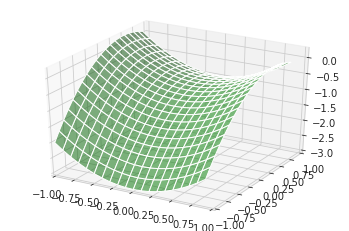

In [30]:
x0 = np.arange(-1, 1, 1/10.)
x1 = np.arange(-1, 1, 1/10.)
x0, x1 = np.meshgrid(x0, x1)
y_truth = x0**2 - x1**2 + x1 - 1

ax = plt.figure().gca(projection='3d')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
surf = ax.plot_surface(x0, x1, y_truth, rstride=1, cstride=1,
                       color='green', alpha=0.5)
plt.show()

In [32]:
from sklearn.utils.random import check_random_state
rng = check_random_state(0)

# Training samples
X_train = rng.uniform(-1, 1, 100).reshape(50, 2)
y_train = X_train[:, 0]**2 - X_train[:, 1]**2 + X_train[:, 1] - 1

# Testing samples
X_test = rng.uniform(-1, 1, 100).reshape(50, 2)
y_test = X_test[:, 0]**2 - X_test[:, 1]**2 + X_test[:, 1] - 1

In [ ]:
print('R2:',est_gp.score(X_test,y_test))

In [ ]:
next_e = sympify((est_gp._program), locals=converter)
next_e

> Comparing Gplearn to traditional ML approaches

In [ ]:
fig = plt.figure(figsize=(12, 10))
for i, (y, score, title) in enumerate([(y_test, None, "Ground Truth"),
                                       (y_gp, score_gp, "SymbolicRegressor"),
                                       (y_tree, score_tree, "DecisionTreeRegressor"),
                                       (y_rf, score_rf, "RandomForestRegressor")]):
ax = fig.add_subplot(2, 2, i+1)
    points = ax.scatter(X, y_true, color='green', alpha=0.5)
    test = ax.scatter(X_test,y,color='red', alpha=0.5)
    plt.title(title)
plt.show()

> Improving the result

In [ ]:
# First Test
def pow_3(x1):
    f = x1**3
    return f

pow_3 = make_function(function=pow_3,name='pow3',arity=1)

# add the new function to the function_set
function_set = ['add', 'sub', 'mul', 'div','cos','sin','neg','inv','pow_3']

est_gp = SymbolicRegressor(population_size=5000,function_set=function_set,
                           generations=45, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0,
                          feature_names=X_train.columns)

est_gp.fit(X_train, y_train)
print('R2:',est_gp.score(X_test,y_test))
next_e = sympify((est_gp._program), locals=converter)
next_e           



> I found that there has a various of Genetic Programming, which are:
*   Cartesian Genetic Programming
*   Linear Genetic Programming
*   Tree-based Genetic Programming







## Cartesian Genetic Programming

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr

import cgpann

In [ ]:
input_data, output_data = load_diabetes(return_X_y=True)

# Splitting the data into training and testing dataset
X_train,X_test,y_train, y_test = train_test_split(input_data, output_data.reshape(-1,1), test_size=0.2,)

In [ ]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()
scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test = scaler_x.transform(X_test)
scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test = scaler_y.transform(y_test)

In [ ]:
num_features = X_train.shape[1]
num_outputs = y_train.shape[1]

In [ ]:
bestGeno = objCgpann.fit_data(X_train,y_train)

In [ ]:
pred = objCgpann.predict_data(X_test)
pearsonr(pred[:,0],y_test[:,0])[0]

## Linear Genetic Programming

In [ ]:
def protectedDiv(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1

pset = gp.PrimitiveSet("MAIN", 1)
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(protectedDiv, 2)
pset.addPrimitive(operator.neg, 1)
pset.addPrimitive(math.cos, 1)
pset.addPrimitive(math.sin, 1)
pset.addEphemeralConstant("rand101", lambda: random.randint(-1,1))



> Creator



In [ ]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)



> Toolbox


In [ ]:
toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

def evalSymbReg(individual, points):
    # Transform the tree expression in a callable function
    func = toolbox.compile(expr=individual)
    # Evaluate the mean squared error between the expression
    # and the real function : x**4 + x**3 + x**2 + x
    sqerrors = ((func(x) - x**4 - x**3 - x**2 - x)**2 for x in points)
    return math.fsum(sqerrors) / len(points),

toolbox.register("evaluate", evalSymbReg, points=[x/10. for x in range(-10,10)])
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)
toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))



> Statistic



In [ ]:
stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
stats_size = tools.Statistics(len)
mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
mstats.register("avg", numpy.mean)
mstats.register("std", numpy.std)
mstats.register("min", numpy.min)
mstats.register("max", numpy.max)

## Data Visualization

In [ ]:
import pygraphviz as pgv

g = pgv.AGraph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)
g.layout(prog="dot")

for i in nodes:
    n = g.get_node(i)
    n.attr["label"] = labels[i]

g.draw("tree.pdf")

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

"""g = nx.Graph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)
pos = nx.graphviz_layout(g, prog="dot")

nx.draw_networkx_nodes(g, pos)
nx.draw_networkx_edges(g, pos)
nx.draw_networkx_labels(g, pos, labels)
plt.show()"""

def GPTree_plot():
  g = nx.Graph()
  g.add_nodes_from(nodes)
  g.add_edges_from(edges)
  pos = nx.graphviz_layout(g, prog = "dot")

  nx.draw_networkx_nodes(g, pos)
  nx.draw_networkx_edges(g, pos)
  nx.draw_networkx_labels(g, pos, labels)

  plt.show()

In [ ]:
!pip install pyevolve

In [ ]:
from pyevolve import GTree
genome = GTree.GTree()
gp_genome = GTree.GTreeGP()

In [ ]:
#Create genome
genome = GTree.GTreeGP()
genome.setParams(max_depth = 4, method = "ramed")
genome.evaluator.set(eval_func)